In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install haversine
import haversine as hs
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv(r"C:\Users\Melvin Wong\DataScience\Springboard\Github\Capstone-Three\Capstone_3\Data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Identifying the columns and the types

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

# Identifying the count, mean, STD, and min


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Columns with null values

In [8]:
#identifying the null values for each column 
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Function to count attrition and attrition % with fields

In [9]:
# Define a function to calculate attrition statistics
def calculate_attrition(df, group_by_column):
    return df.groupby(group_by_column).agg(
        TotalEmployees=('Attrition', 'size'),
        AttritionCount=('Attrition', lambda x: (x == 'Yes').sum()),
        NonAttritionCount=('Attrition', lambda x: (x == 'No').sum()),
        AttritionPercentage=('Attrition', lambda x: round((x == 'Yes').sum() / x.size * 100, 2)),
        NonAttritionPercentage=('Attrition', lambda x: round((x == 'No').sum() / x.size * 100, 2))
    ).reset_index()


# List of relevant columns to analyze
relevant_columns = [col for col in df.columns if col != 'Attrition' and col not in ['EmployeeNumber', 'EmployeeCount']]

# Dictionary to store results for each column
attrition_analysis = {}

# Calculate attrition for each relevant column
for column in relevant_columns:
    attrition_analysis[column] = calculate_attrition(df, column)


# Attrition count and attrition % for selected fields

In [10]:
# Display the result for 'OverTime'
attrition_analysis['OverTime']

,OverTime,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,No,1054,110,944,10.44,89.56
1,Yes,416,127,289,30.53,69.47


In [11]:
# Display the result for 'Number of Companies worked for'
attrition_analysis['NumCompaniesWorked']

,NumCompaniesWorked,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,197,23,174,11.68,88.32
1,1,521,98,423,18.81,81.19
2,2,146,16,130,10.96,89.04
3,3,159,16,143,10.06,89.94
4,4,139,17,122,12.23,87.77
5,5,63,16,47,25.40,74.60
6,6,70,16,54,22.86,77.14
7,7,74,17,57,22.97,77.03
8,8,49,6,43,12.24,87.76
9,9,52,12,40,23.08,76.92


In [12]:
# Display the result for 'EnvironmentSatisfaction'
attrition_analysis['EnvironmentSatisfaction']

,EnvironmentSatisfaction,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,1,284,72,212,25.35,74.65
1,2,287,43,244,14.98,85.02
2,3,453,62,391,13.69,86.31
3,4,446,60,386,13.45,86.55


In [13]:
# Display the result for 'PercentSalaryHike'
attrition_analysis['PercentSalaryHike']

,PercentSalaryHike,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,11,210,41,169,19.52,80.48
1,12,198,33,165,16.67,83.33
2,13,209,34,175,16.27,83.73
3,14,201,24,177,11.94,88.06
4,15,101,18,83,17.82,82.18
5,16,78,14,64,17.95,82.05
6,17,82,14,68,17.07,82.93
7,18,89,13,76,14.61,85.39
8,19,76,9,67,11.84,88.16
9,20,55,7,48,12.73,87.27


In [14]:
# Display the result for 'StockOptionLevel'
attrition_analysis['StockOptionLevel']

,StockOptionLevel,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,631,154,477,24.41,75.59
1,1,596,56,540,9.40,90.60
2,2,158,12,146,7.59,92.41
3,3,85,15,70,17.65,82.35


In [15]:
# Display the result for 'YearsWithCurrManager'
attrition_analysis['YearsWithCurrManager']

,YearsWithCurrManager,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,263,85,178,32.32,67.68
1,1,76,11,65,14.47,85.53
2,2,344,50,294,14.53,85.47
3,3,142,19,123,13.38,86.62
4,4,98,11,87,11.22,88.78
5,5,31,4,27,12.90,87.10
6,6,29,4,25,13.79,86.21
7,7,216,31,185,14.35,85.65
8,8,107,10,97,9.35,90.65
9,9,64,6,58,9.38,90.62


In [16]:
# Display the result for 'YearsSinceLastPromotion'
attrition_analysis['YearsSinceLastPromotion']

,YearsSinceLastPromotion,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,0,581,110,471,18.93,81.07
1,1,357,49,308,13.73,86.27
2,2,159,27,132,16.98,83.02
3,3,52,9,43,17.31,82.69
4,4,61,5,56,8.20,91.80
5,5,45,2,43,4.44,95.56
6,6,32,6,26,18.75,81.25
7,7,76,16,60,21.05,78.95
8,8,18,0,18,0.00,100.00
9,9,17,4,13,23.53,76.47


In [17]:
# Display the result for 'BusinessTravel'
attrition_analysis['BusinessTravel']

,BusinessTravel,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,Non-Travel,150,12,138,8.00,92.00
1,Travel_Frequently,277,69,208,24.91,75.09
2,Travel_Rarely,1043,156,887,14.96,85.04


In [18]:
# Display the result for 'JobInvolvement'
attrition_analysis['JobInvolvement']

,JobInvolvement,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,1,83,28,55,33.73,66.27
1,2,375,71,304,18.93,81.07
2,3,868,125,743,14.40,85.60
3,4,144,13,131,9.03,90.97


In [19]:
# Display the result for 'Education'
attrition_analysis['Education']

,Education,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,1,170,31,139,18.24,81.76
1,2,282,44,238,15.60,84.40
2,3,572,99,473,17.31,82.69
3,4,398,58,340,14.57,85.43
4,5,48,5,43,10.42,89.58


In [20]:
# Display the result for 'Department'
attrition_analysis['Department']

,Department,TotalEmployees,AttritionCount,NonAttritionCount,AttritionPercentage,NonAttritionPercentage
0,Human Resources,63,12,51,19.05,80.95
1,Research & Development,961,133,828,13.84,86.16
2,Sales,446,92,354,20.63,79.37


In [56]:
df.replace({'Yes': 1, 'No': 0}, inplace=True)
df.replace({'Y': 1, 'N': 0}, inplace=True)
df.replace({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}, inplace=True)
df.replace({'Single': 0, 'Divorced': 1, 'Married': 2}, inplace=True)

In [57]:
cleaned_df = df.drop(columns=['Department','EducationField','Gender', 'JobRole'])


In [58]:
X = cleaned_df
y = cleaned_df.Attrition

In [59]:
#Import ML models:

from sklearn.model_selection import train_test_split, learning_curve 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Splitting the dataset into training and test set:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling:

scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [60]:
df_dummies = pd.get_dummies(cleaned_df, columns=['Attrition'], drop_first=True)

In [63]:
scaler = StandardScaler()

In [67]:
scaled_features = scaler.fit_transform(df_dummies)

In [68]:
df_scaled = pd.DataFrame(scaled_features, columns=df_dummies.columns)

In [69]:
X = cleaned_df.drop(columns=['Attrition'])
y = cleaned_df['Attrition']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [71]:
print("X_train:\n", X_train.head())
print("X_test:\n", X_test.head())
print("y_train:\n", y_train.head())
print("y_test:\n", y_test.head())

X_train:
       Age  BusinessTravel  DailyRate  DistanceFromHome  Education  \
714    50               1       1126                 1          2   
135    36               1        216                 6          2   
1271   21               1        337                 7          1   
477    50               0       1246                 3          3   
806    52               1        994                 7          4   

      EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  HourlyRate  \
714               1             997                        4          66   
135               1             178                        2          84   
1271              1            1780                        2          31   
477               1             644                        1          99   
806               1            1118                        2          87   

      JobInvolvement  ...  RelationshipSatisfaction  StandardHours  \
714                3  ...                       

MODELING

In [72]:
from sklearn.model_selection import train_test_split,train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [74]:
scaler_x = MinMaxScaler((-1,1))
X_train = scaler_x.fit_transform(X_train)
X_test = scaler_x.transform(X_test)

In [75]:
C_param_range = [0.001,0.01,0.1,1,10,100]

table = pd.DataFrame(columns = ['C_parameter','Accuracy'])
table['C_parameter'] = C_param_range


j = 0
for i in C_param_range:
    
    # Apply logistic regression model to training data
    Logreg = LogisticRegression(penalty = 'l2', C = i,random_state = 40)
    Logreg.fit(X_train,y_train)
    
    # Predict using model
    y_pred_lr = Logreg.predict(X_test)
    
    # Saving accuracy score in table
    table.iloc[j,1] = accuracy_score(y_test,y_pred_lr)
    j += 1
    
table   

,C_parameter,Accuracy
0,0.001,0.861678
1,0.010,0.863946
2,0.100,0.873016
3,1.000,0.873016
4,10.000,0.870748
5,100.000,0.873016


In [76]:
from sklearn.metrics import confusion_matrix

cnf_matrix= confusion_matrix(y_test,y_pred_lr)
print(cnf_matrix)
Accuracy_lr=Logreg.score(X_test,y_test)

print(Accuracy_lr)

[[367  13]
 [ 43  18]]
0.873015873015873


In [78]:
cv_scores_test= cross_val_score(Logreg,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(Logreg,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_lr_test= cv_scores_test.mean()
cv_scores_lr_train= cv_scores_train.mean()
cv_scores_std_test_lr= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_lr_test))
print ('Mean cross validation train score: ' +str(cv_scores_lr_train))
print ('Standard deviation in cv test scores: ' +str(cv_scores_std_test_lr))

[0.91801619 0.67653509 0.62390351 0.75657895 0.77960526]
Mean cross validation test score: 0.7509278002699056
Mean cross validation train score: 0.8193734827264241
Standard deviation in cv test scores: 0.10044133619448259


C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

In [79]:
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.metrics import plot_roc_curve

# Apply KNN model to training data:

knn = KNeighborsClassifier(p=2,weights='distance',n_neighbors=50)
knn.fit(X_train,y_train)

# Predict using model:

y_predict_knn=knn.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_knn)
print(cnf_matrix)
Accuracy_knn=knn.score(X_test,y_test)

print(Accuracy_knn)
#knn_disp= plot_roc_curve(knn,X_test,y_test)

[[380   0]
 [ 60   1]]
0.8639455782312925


In [80]:
cv_scores_test= cross_val_score(knn,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(knn,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_knn_test= cv_scores_test.mean()
cv_scores_knn_train= cv_scores_train.mean()
cv_scores_std_knn= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_knn_test))
print ('Mean cross validation train score: ' +str(cv_scores_knn_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_knn))

[0.78036437 0.66666667 0.54934211 0.71710526 0.79934211]
Mean cross validation test score: 0.7025641025641025
Mean cross validation train score: 0.7725688731633005
Standard deviation in cv scores: 0.08988427617343071


In [81]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict using model:

y_predict_svm=svm.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_svm)
print(cnf_matrix)

Accuracy_svm=svm.score(X_test,y_test)
print(Accuracy_svm)

[[375   5]
 [ 50  11]]
0.8752834467120182


In [82]:
cv_scores_test= cross_val_score(svm,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(svm,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_svm_test= cv_scores_test.mean()
cv_scores_svm_train= cv_scores_train.mean()
cv_scores_std_svm= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_svm_test))
print ('Mean cross validation train score: ' +str(cv_scores_svm_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_svm))

[0.91093117 0.71491228 0.61951754 0.8377193  0.76973684]
Mean cross validation test score: 0.7705634278002699
Mean cross validation train score: 0.8193232099857486
Standard deviation in cv scores: 0.10012552881874205


In [83]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
Accuracy_rf=rf.score(X_test,y_test)
print(Accuracy_rf)

[[377   3]
 [ 57   4]]
0.8639455782312925


In [84]:
cv_scores_test= cross_val_score(rf,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(rf,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_rf_test= cv_scores_test.mean()
cv_scores_rf_train= cv_scores_train.mean()
cv_scores_std_rf= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_rf_test))
print ('Mean cross validation train score: ' +str(cv_scores_rf_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_rf))

[0.87854251 0.6502193  0.6058114  0.63212719 0.74122807]
Mean cross validation test score: 0.7015856950067476
Mean cross validation train score: 0.7898971448228413
Standard deviation in cv scores: 0.09951978442116603


In [85]:
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier
gbc = GradientBoostingClassifier(subsample=0.8, learning_rate=0.05 , n_estimators=160, random_state=5, max_depth=9, max_leaf_nodes=100)
gbc.fit(X_train, y_train)

#Predict using the model:

y_predict_gbc = gbc.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_gbc)
print(cnf_matrix)
Accuracy_gbc=gbc.score(X_test,y_test)
print(Accuracy_gbc)

[[374   6]
 [ 50  11]]
0.873015873015873


In [86]:
cv_scores_test= cross_val_score(gbc,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(gbc,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_gbc_test= cv_scores_test.mean()
cv_scores_gbc_train= cv_scores_train.mean()
cv_scores_std_gbc= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_gbc_test))
print ('Mean cross validation train score: ' +str(cv_scores_gbc_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_gbc))

[0.80769231 0.60197368 0.57675439 0.67214912 0.74890351]
Mean cross validation test score: 0.6814946018893387
Mean cross validation train score: 0.800766622438449
Standard deviation in cv scores: 0.0870071822744451


In [87]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

#Predict using the model:

y_predict_nb=nb.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_nb)
print(cnf_matrix)
Accuracy_nb=nb.score(X_test,y_test)
print(Accuracy_nb)

[[305  75]
 [ 25  36]]
0.7732426303854876


In [88]:
cv_scores_test= cross_val_score(nb,X_test,y_test,cv=5,scoring='roc_auc')
cv_scores_train= cross_val_score(nb,X_train,y_train,cv=5,scoring='roc_auc')
print(cv_scores_test)
cv_scores_nb_test= cv_scores_test.mean()
cv_scores_nb_train= cv_scores_train.mean()
cv_scores_std_nb= cv_scores_test.std()
print ('Mean cross validation test score: ' +str(cv_scores_nb_test))
print ('Mean cross validation train score: ' +str(cv_scores_nb_train))
print ('Standard deviation in cv scores: ' +str(cv_scores_std_nb))

[0.74190283 0.70175439 0.69627193 0.66776316 0.67105263]
Mean cross validation test score: 0.6957489878542511
Mean cross validation train score: 0.7751752911690992
Standard deviation in cv scores: 0.026681950758384667


In [89]:
myLabels = [ 'Logistic Regression','KNN','SVM','Random Forest','Gradient Boost', 'Naive Bayes']
score_test= [  cv_scores_lr_test,cv_scores_knn_test,cv_scores_svm_test,cv_scores_rf_test,cv_scores_gbc_test,cv_scores_nb_test]
score_train= [  cv_scores_lr_train,cv_scores_knn_train,cv_scores_svm_train,cv_scores_rf_train,cv_scores_gbc_train,cv_scores_nb_train]
Accuracy_score = [Accuracy_lr,Accuracy_knn,Accuracy_svm,Accuracy_rf,Accuracy_gbc,Accuracy_nb]

score_tab_acc = pd.DataFrame(list(zip(myLabels, Accuracy_score)), 
               columns =['Algorithm', 'Model accuracy score']) 

score_tab = pd.DataFrame(list(zip(myLabels, score_train, score_test)), 
               columns =['Algorithm', 'ROC-AUC train score', 'ROC-AUC test score' ]) 
print(score_tab_acc)

score_tab

             Algorithm  Model accuracy score
0  Logistic Regression              0.873016
1                  KNN              0.863946
2                  SVM              0.875283
3        Random Forest              0.863946
4       Gradient Boost              0.873016
5          Naive Bayes              0.773243


,Algorithm,ROC-AUC train score,ROC-AUC test score
0,Logistic Regression,0.819373,0.750928
1,KNN,0.772569,0.702564
2,SVM,0.819323,0.770563
3,Random Forest,0.789897,0.701586
4,Gradient Boost,0.800767,0.681495
5,Naive Bayes,0.775175,0.695749


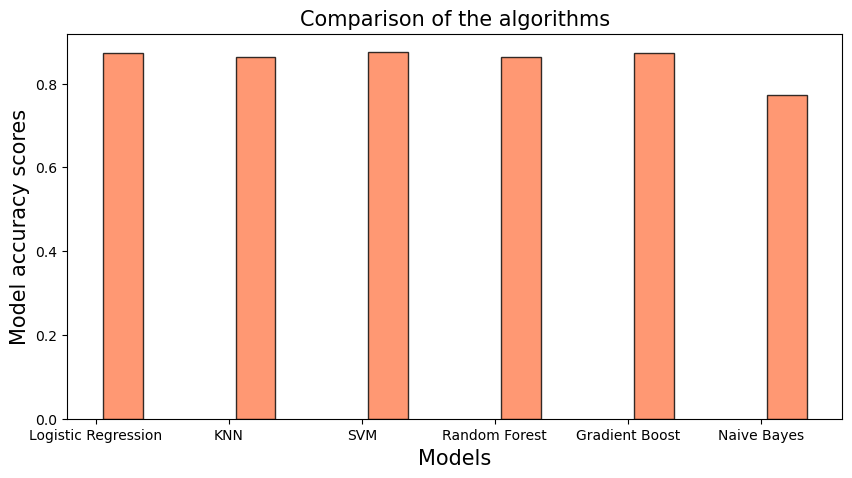

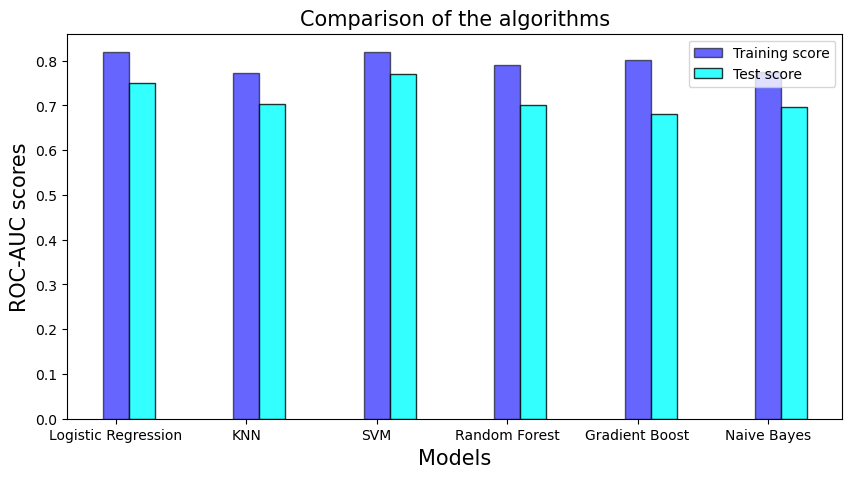

In [90]:
index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('Model accuracy scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
#patterns = [ "/"]
_=plt.bar(index_acc,Accuracy_score,color='coral',alpha=0.8,label='Accuracy score',edgecolor='k',width=0.3)
plt.xticks([1, 2,3,4,5,6], myLabels)
#plt.legend()
plt.savefig("26.png")
plt.show()

#plotting and comparing ROC-AUC train/test scores:

index=[1,2,3,4,5,6]
index_acc=[1.2,2.2,3.2,4.2,5.2,6.2]
plt.figure(figsize=(10,5))
plt.xlabel('Models',fontsize=15)
plt.ylabel ('ROC-AUC scores',fontsize=15)
plt.title('Comparison of the algorithms',fontsize=15)
_=plt.bar(index,score_train,color='b',alpha=0.6,label='Training score',edgecolor='k',width=0.2)
_=plt.bar(index_acc,score_test,color='cyan',alpha=0.8,label='Test score',edgecolor='k',width=0.2)
plt.xticks([1, 2,3,4,5,6], myLabels)
plt.legend()
plt.savefig("27.png")
plt.show()

In [91]:
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier(max_features='sqrt',random_state=1, n_jobs=-1)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 6], "min_samples_split" : [2, 4], "n_estimators": [50, 100]}

gs = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1, error_score='raise')
try:
    gs.fit(X_train, y_train)
    # Print the best estimator and the best score
    print("Best Estimator:", gs.best_estimator_)
    print("Best Score:", gs.best_score_)
except Exception as e:
    print(f"An error occurred: {e}")
    

Best Estimator: RandomForestClassifier(criterion='entropy', n_jobs=-1, random_state=1)
Best Score: 0.8542274052478134


In [92]:
rf = RandomForestClassifier(bootstrap=True, criterion='entropy',
            max_features='sqrt',min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000,)
rf.fit(X_train, y_train)
y_predictions = rf.predict(X_test)
acc = accuracy_score(y_test, y_predictions)
cv = cross_val_score(rf, X_test, y_test,scoring='roc_auc').mean()
print("accuracy:" + str(acc))
print("cross validation:" + str(cv))

accuracy:0.8639455782312925
cross validation:0.7053221997300946


In [93]:
target = pd.Series(y_predictions, name='Attrition')
user_id = cleaned_df['EmployeeNumber']

output = pd.DataFrame(list(zip(user_id, target)), 
               columns =['EmployeeNumber', 'Attrition']) 




output.to_csv('final_result_rf.csv', index=False, header=True)

In [94]:
features_cols = ['BusinessTravel', 'DistanceFromHome', 'Education','HourlyRate', 'JobInvolvement','JobLevel','JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike' ,'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion', 'YearsWithCurrManager']
X = cleaned_df[features_cols]

In [95]:
#Feature importances
importances = list(rf.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

                    Features  Importance scores
0             BusinessTravel           0.000000
1           DistanceFromHome           0.000000
2                  Education           0.000000
3                 HourlyRate           0.004435
4             JobInvolvement           0.009418
5                   JobLevel           0.019501
6            JobSatisfaction           0.019731
7              MonthlyIncome           0.020878
8                MonthlyRate           0.022371
9         NumCompaniesWorked           0.022525
10                    Over18           0.026176
11                  OverTime           0.026699
12         PercentSalaryHike           0.027647
13         PerformanceRating           0.027764
14  RelationshipSatisfaction           0.028326
15             StandardHours           0.034330
16          StockOptionLevel           0.034752
17         TotalWorkingYears           0.036123
18     TrainingTimesLastYear           0.036199
19           WorkLifeBalance           0

In [96]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_rf = rf.predict_proba(X_test)
y_scores_rf = y_scores_rf[:,1]
auroc = roc_auc_score(y_test, y_scores_rf)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7687446074201898


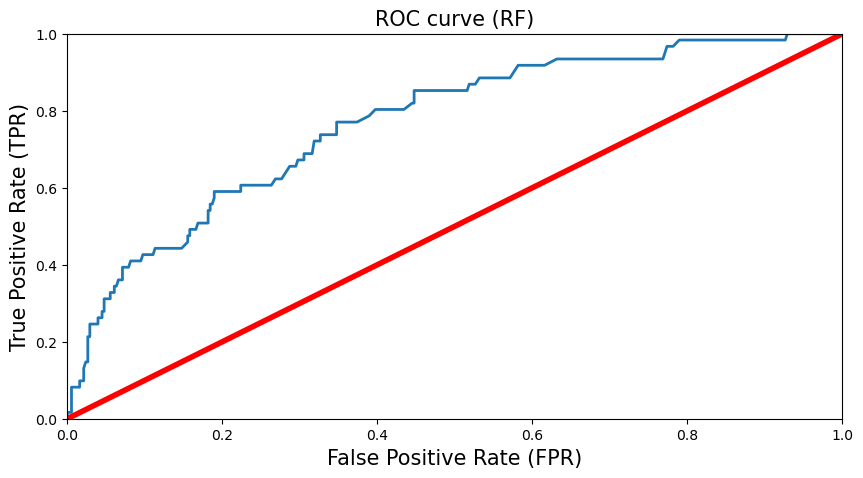

In [97]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_rf)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (RF)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("30.png")
plt.show()

In [98]:
GB = GradientBoostingClassifier()
gb_param = {
        'loss' : ["exponential"],
        'n_estimators' : [100,200,300],
        'learning_rate': [0.1, 0.05, 0.01],
        'max_depth': [4, 8],
        'min_samples_leaf': [100,150],
        'max_features': [0.3, 0.1] 
        }

gsGB = GridSearchCV(GB, param_grid = gb_param, cv=3, scoring="accuracy", n_jobs= -1, verbose = 1)
gsGB.fit(X_train,y_train)
print(gsGB.best_estimator_)
print(gsGB.best_score_)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
GradientBoostingClassifier(loss='exponential', max_depth=8, max_features=0.3,
                           min_samples_leaf=100, n_estimators=200)
0.8649173955296404


In [99]:
GB= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='exponential', max_depth=8,
              max_features=0.3, max_leaf_nodes=None,
              min_impurity_decrease=0.0,
              min_samples_leaf=100, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
GB.fit(X_train, y_train)
y_predictions_GB = GB.predict(X_test)
acc_GB = accuracy_score(y_test, y_predictions_GB)
cv_GB = cross_val_score(GB, X_test, y_test,scoring='roc_auc').mean()
print(acc_GB)
print(cv_GB)

0.8526077097505669
0.6351720647773279


In [ ]:
target = pd.Series(y_predictions_GB, name='is_fraud')
user_id = cleaned_df['cc_num']

output = pd.DataFrame(list(zip(user_id, target)), 
               columns =['cc_num', 'is_fraud']) 




output.to_csv('final_result_gb.csv', index=False, header=True)

In [100]:
features = X
importances = list(GB.feature_importances_)
imp=np.sort(importances)
tab=pd.DataFrame(list(zip(X,imp)),columns =['Features', 'Importance scores']) 
print(tab)

                    Features  Importance scores
0             BusinessTravel           0.000000
1           DistanceFromHome           0.000000
2                  Education           0.000000
3                 HourlyRate           0.000090
4             JobInvolvement           0.003412
5                   JobLevel           0.005203
6            JobSatisfaction           0.006807
7              MonthlyIncome           0.010308
8                MonthlyRate           0.011241
9         NumCompaniesWorked           0.016310
10                    Over18           0.019039
11                  OverTime           0.022374
12         PercentSalaryHike           0.025136
13         PerformanceRating           0.025248
14  RelationshipSatisfaction           0.026968
15             StandardHours           0.027394
16          StockOptionLevel           0.029004
17         TotalWorkingYears           0.031550
18     TrainingTimesLastYear           0.031713
19           WorkLifeBalance           0

In [101]:
from sklearn.metrics import auc, roc_curve, roc_auc_score
y_scores_gb = GB.predict_proba(X_test)
y_scores_gb = y_scores_gb[:,1]
auroc = roc_auc_score(y_test, y_scores_gb)
print("ROC-AUC Score:", auroc)

ROC-AUC Score: 0.7877049180327869


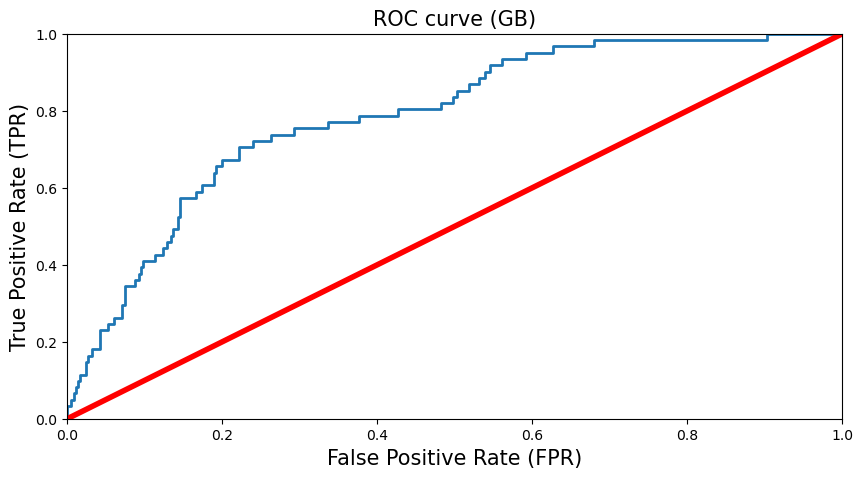

In [102]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores_gb)
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=15)
    plt.ylabel('True Positive Rate (TPR)', fontsize=15)
    plt.title('ROC curve (GB)',fontsize=15)

plt.figure(figsize=(10, 5))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.savefig("31.png")
plt.show()